# Imports

In [46]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import math

# 1.0 API Request

In [2]:
response = requests.get(
    'https://www.sofascore.com/ponte-preta-palmeiras/nOsuO#id:12149692',
    headers={
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'
    }
)

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"95a0ecfab4"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11067464/shotmap', headers=headers)

In [7]:
response.status_code

200

In [8]:
headers['If-Modified-Since'] = 'Thu, 08 Feb 2024 00:00:00 GMT'

In [9]:
response = requests.get('https://api.sofascore.com/api/v1/event/12149692/shotmap', headers=headers)

In [10]:
response.status_code

200

In [11]:
shots = response.json()

In [12]:
dados_json = {
    'shotmap': [{'player': {'name': 'Renato',
    'slug': 'renato',
    'shortName': 'Renato',
    'position': 'M',
    'jerseyNumber': '19',
    'userCount': 43,
    'id': 243111},
   'isHome': False,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'free-kick',
   'playerCoordinates': {'x': 25.3, 'y': 64, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-left',
   'goalMouthCoordinates': {'x': 0, 'y': 54.2, 'z': 15.8},
   'id': 2602217,
   'time': 90,
   'timeSeconds': 5360,
   'draw': {'start': {'x': 64, 'y': 25.3},
    'end': {'x': 45.8, 'y': 0},
    'goal': {'x': 45.8, 'y': 84.2}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 40,
   'incidentType': 'shot'},
  {'player': {'name': 'Estevão',
    'firstName': 'Estevão',
    'slug': 'estevao',
    'shortName': 'Estevão',
    'position': 'M',
    'jerseyNumber': '41',
    'userCount': 4319,
    'id': 1597265},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 9.2, 'y': 69.1, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'close-right',
   'goalMouthCoordinates': {'x': 0, 'y': 41.7, 'z': 19.4},
   'id': 2602210,
   'time': 82,
   'timeSeconds': 4919,
   'draw': {'start': {'x': 69.1, 'y': 9.2},
    'end': {'x': 58.3, 'y': 0},
    'goal': {'x': 58.3, 'y': 80.6}},
   'reversedPeriodTime': 9,
   'reversedPeriodTimeSeconds': 481,
   'incidentType': 'shot'},
  {'player': {'name': 'Caio Paulista',
    'slug': 'caio-paulista',
    'shortName': 'C. Paulista',
    'position': 'D',
    'jerseyNumber': '16',
    'userCount': 951,
    'id': 931591},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'regular',
   'playerCoordinates': {'x': 7.2, 'y': 27, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'close-left',
   'goalMouthCoordinates': {'x': 0, 'y': 59, 'z': 33.3},
   'id': 2602203,
   'time': 79,
   'timeSeconds': 4699,
   'draw': {'start': {'x': 27, 'y': 7.2},
    'end': {'x': 41, 'y': 0},
    'goal': {'x': 41, 'y': 66.7}},
   'reversedPeriodTime': 12,
   'reversedPeriodTimeSeconds': 701,
   'incidentType': 'shot'},
  {'player': {'name': 'Luis Guilherme',
    'firstName': 'Luis Guilherme',
    'lastName': '',
    'slug': 'luis-guilherme',
    'shortName': 'Luis Guilherme',
    'position': 'F',
    'jerseyNumber': '31',
    'userCount': 1492,
    'id': 1464248},
   'isHome': True,
   'shotType': 'block',
   'situation': 'assisted',
   'playerCoordinates': {'x': 19.8, 'y': 59.1, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'low-right',
   'goalMouthCoordinates': {'x': 0, 'y': 47.2, 'z': 19},
   'blockCoordinates': {'x': 16.2, 'y': 57.9, 'z': 0},
   'id': 2602202,
   'time': 79,
   'timeSeconds': 4697,
   'draw': {'start': {'x': 59.1, 'y': 19.8},
    'block': {'x': 57.9, 'y': 16.2},
    'end': {'x': 52.8, 'y': 0},
    'goal': {'x': 52.8, 'y': 81}},
   'reversedPeriodTime': 12,
   'reversedPeriodTimeSeconds': 703,
   'incidentType': 'shot'},
  {'player': {'name': 'Jeh',
    'firstName': 'Jeh',
    'lastName': '',
    'slug': 'jeh',
    'shortName': 'Jeh',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 80,
    'id': 1464661},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 8.7, 'y': 26.6, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 62.7, 'z': 12.5},
   'id': 2602201,
   'time': 78,
   'timeSeconds': 4647,
   'draw': {'start': {'x': 26.6, 'y': 8.7},
    'end': {'x': 37.3, 'y': 0},
    'goal': {'x': 37.3, 'y': 87.5}},
   'reversedPeriodTime': 13,
   'reversedPeriodTimeSeconds': 753,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'assisted',
   'playerCoordinates': {'x': 2.2, 'y': 46.7, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 51.2, 'z': 8.2},
   'id': 2602184,
   'time': 70,
   'timeSeconds': 4185,
   'draw': {'start': {'x': 46.7, 'y': 2.2},
    'end': {'x': 48.8, 'y': 0},
    'goal': {'x': 48.8, 'y': 91.8}},
   'reversedPeriodTime': 21,
   'reversedPeriodTimeSeconds': 1215,
   'incidentType': 'shot'},
  {'player': {'name': 'Raphael Veiga',
    'firstName': '',
    'lastName': '',
    'slug': 'raphael-veiga',
    'shortName': 'Raphael Veiga',
    'position': 'M',
    'jerseyNumber': '23',
    'userCount': 9109,
    'id': 840020,
    'fieldTranslations': {'nameTranslation': {'ar': 'رافائيل فييغا'},
     'shortNameTranslation': {'ar': 'ر. فييغا'}}},
   'isHome': True,
   'shotType': 'post',
   'situation': 'assisted',
   'playerCoordinates': {'x': 31.9, 'y': 42.5, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'high',
   'goalMouthCoordinates': {'x': 0, 'y': 54.5, 'z': 39.2},
   'id': 2602180,
   'time': 69,
   'timeSeconds': 4094,
   'draw': {'start': {'x': 42.5, 'y': 31.9},
    'end': {'x': 45.5, 'y': 0},
    'goal': {'x': 45.5, 'y': 60.8}},
   'reversedPeriodTime': 22,
   'reversedPeriodTimeSeconds': 1306,
   'incidentType': 'shot'},
  {'player': {'name': 'Joaquín Piquerez',
    'firstName': '',
    'lastName': '',
    'slug': 'joaquin-piquerez',
    'shortName': 'J. Piquerez',
    'position': 'D',
    'jerseyNumber': '22',
    'userCount': 2192,
    'id': 881110},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'assisted',
   'playerCoordinates': {'x': 10.6, 'y': 48.8, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-right',
   'goalMouthCoordinates': {'x': 0, 'y': 46.2, 'z': 18.4},
   'id': 2602175,
   'time': 66,
   'timeSeconds': 3948,
   'draw': {'start': {'x': 48.8, 'y': 10.6},
    'end': {'x': 53.8, 'y': 0},
    'goal': {'x': 53.8, 'y': 81.6}},
   'reversedPeriodTime': 25,
   'reversedPeriodTimeSeconds': 1452,
   'incidentType': 'shot'},
  {'player': {'name': 'Murilo',
    'firstName': '',
    'lastName': '',
    'slug': 'murilo',
    'shortName': 'Murilo',
    'position': 'D',
    'jerseyNumber': '26',
    'userCount': 1520,
    'id': 874729},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'set-piece',
   'playerCoordinates': {'x': 8, 'y': 55.2, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'close-left',
   'goalMouthCoordinates': {'x': 0, 'y': 58.8, 'z': 12.5},
   'blockCoordinates': {'x': 0.90000000000001, 'y': 44.2, 'z': 0},
   'id': 2602165,
   'time': 63,
   'timeSeconds': 3779,
   'draw': {'start': {'x': 55.2, 'y': 8},
    'block': {'x': 44.2, 'y': 0.90000000000001},
    'end': {'x': 41.2, 'y': 0},
    'goal': {'x': 41.2, 'y': 87.5}},
   'reversedPeriodTime': 28,
   'reversedPeriodTimeSeconds': 1621,
   'incidentType': 'shot'},
  {'player': {'name': 'Jeh',
    'firstName': 'Jeh',
    'lastName': '',
    'slug': 'jeh',
    'shortName': 'Jeh',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 80,
    'id': 1464661},
   'isHome': False,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 6, 'y': 54.8, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'high-right',
   'goalMouthCoordinates': {'x': 0, 'y': 47.6, 'z': 31},
   'blockCoordinates': {'x': 1.1, 'y': 53.4, 'z': 0},
   'id': 2602161,
   'time': 62,
   'timeSeconds': 3685,
   'draw': {'start': {'x': 54.8, 'y': 6},
    'block': {'x': 53.4, 'y': 1.1},
    'end': {'x': 52.4, 'y': 0},
    'goal': {'x': 52.4, 'y': 69}},
   'reversedPeriodTime': 29,
   'reversedPeriodTimeSeconds': 1715,
   'incidentType': 'shot'},
  {'player': {'name': 'Emerson Santos',
    'firstName': '',
    'lastName': '',
    'slug': 'emerson-santos',
    'shortName': 'E. Santos',
    'position': 'M',
    'jerseyNumber': '8',
    'userCount': 14,
    'id': 244087},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'corner',
   'playerCoordinates': {'x': 8, 'y': 49.3, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'high',
   'goalMouthCoordinates': {'x': 0, 'y': 52.3, 'z': 79.2},
   'id': 2602134,
   'time': 60,
   'timeSeconds': 3554,
   'draw': {'start': {'x': 49.3, 'y': 8},
    'end': {'x': 47.7, 'y': 0},
    'goal': {'x': 47.7, 'y': 20.8}},
   'reversedPeriodTime': 31,
   'reversedPeriodTimeSeconds': 1846,
   'incidentType': 'shot'},
  {'player': {'name': 'Endrick',
    'firstName': '',
    'lastName': '',
    'slug': 'endrick',
    'shortName': 'Endrick',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 42059,
    'id': 1174937,
    'fieldTranslations': {'nameTranslation': {'ar': 'إندريك فيليبي'},
     'shortNameTranslation': {'ar': 'إ. فيليبي'}}},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'set-piece',
   'playerCoordinates': {'x': 19.2, 'y': 54, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'high-right',
   'goalMouthCoordinates': {'x': 0, 'y': 38.3, 'z': 86.1},
   'id': 2602122,
   'time': 55,
   'timeSeconds': 3261,
   'draw': {'start': {'x': 54, 'y': 19.2},
    'end': {'x': 61.7, 'y': 0},
    'goal': {'x': 61.7, 'y': 13.9}},
   'reversedPeriodTime': 36,
   'reversedPeriodTimeSeconds': 2139,
   'incidentType': 'shot'},
  {'player': {'name': 'Igor',
    'firstName': '',
    'lastName': '',
    'slug': 'igor',
    'shortName': 'Igor',
    'position': 'D',
    'jerseyNumber': '2',
    'userCount': 43,
    'id': 1017027},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 23.7, 'y': 29.5, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 66.7, 'z': 9.7},
   'id': 2602112,
   'time': 52,
   'timeSeconds': 3060,
   'draw': {'start': {'x': 29.5, 'y': 23.7},
    'end': {'x': 33.3, 'y': 0},
    'goal': {'x': 33.3, 'y': 90.3}},
   'reversedPeriodTime': 39,
   'reversedPeriodTimeSeconds': 2340,
   'incidentType': 'shot'},
  {'player': {'name': 'Endrick',
    'firstName': '',
    'lastName': '',
    'slug': 'endrick',
    'shortName': 'Endrick',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 42059,
    'id': 1174937,
    'fieldTranslations': {'nameTranslation': {'ar': 'إندريك فيليبي'},
     'shortNameTranslation': {'ar': 'إ. فيليبي'}}},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 21.7, 'y': 61.2, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'high-left',
   'goalMouthCoordinates': {'x': 0, 'y': 63.7, 'z': 90.3},
   'id': 2602111,
   'time': 51,
   'timeSeconds': 3000,
   'draw': {'start': {'x': 61.2, 'y': 21.7},
    'end': {'x': 36.3, 'y': 0},
    'goal': {'x': 36.3, 'y': 9.7}},
   'reversedPeriodTime': 40,
   'reversedPeriodTimeSeconds': 2400,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 5.2, 'y': 57.7, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 68.1, 'z': 6.9},
   'id': 2601995,
   'time': 43,
   'timeSeconds': 2553,
   'draw': {'start': {'x': 57.7, 'y': 5.2},
    'end': {'x': 31.9, 'y': 0},
    'goal': {'x': 31.9, 'y': 93.1}},
   'reversedPeriodTime': 3,
   'reversedPeriodTimeSeconds': 147,
   'incidentType': 'shot'},
  {'player': {'name': 'Murilo',
    'firstName': '',
    'lastName': '',
    'slug': 'murilo',
    'shortName': 'Murilo',
    'position': 'D',
    'jerseyNumber': '26',
    'userCount': 1520,
    'id': 874729},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'corner',
   'playerCoordinates': {'x': 2.6, 'y': 55.7, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'low-right',
   'goalMouthCoordinates': {'x': 0, 'y': 46.3, 'z': 13.3},
   'id': 2601954,
   'time': 38,
   'timeSeconds': 2264,
   'draw': {'start': {'x': 55.7, 'y': 2.6},
    'end': {'x': 53.7, 'y': 0},
    'goal': {'x': 53.7, 'y': 86.7}},
   'reversedPeriodTime': 8,
   'reversedPeriodTimeSeconds': 436,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 7.7, 'y': 46.2, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'low-left',
   'goalMouthCoordinates': {'x': 0, 'y': 53.1, 'z': 11.4},
   'blockCoordinates': {'x': 1.2, 'y': 48.6, 'z': 0},
   'id': 2601953,
   'time': 37,
   'timeSeconds': 2211,
   'draw': {'start': {'x': 46.2, 'y': 7.7},
    'block': {'x': 48.6, 'y': 1.2},
    'end': {'x': 46.9, 'y': 0},
    'goal': {'x': 46.9, 'y': 88.6}},
   'reversedPeriodTime': 9,
   'reversedPeriodTimeSeconds': 489,
   'incidentType': 'shot'},
  {'player': {'name': 'Raphael Veiga',
    'firstName': '',
    'lastName': '',
    'slug': 'raphael-veiga',
    'shortName': 'Raphael Veiga',
    'position': 'M',
    'jerseyNumber': '23',
    'userCount': 9109,
    'id': 840020,
    'fieldTranslations': {'nameTranslation': {'ar': 'رافائيل فييغا'},
     'shortNameTranslation': {'ar': 'ر. فييغا'}}},
   'isHome': True,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 13.1, 'y': 51.6, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'low-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 50.6, 'z': 13.9},
   'blockCoordinates': {'x': 2.3, 'y': 50, 'z': 0},
   'id': 2601936,
   'time': 34,
   'timeSeconds': 2034,
   'draw': {'start': {'x': 51.6, 'y': 13.1},
    'block': {'x': 50, 'y': 2.3},
    'end': {'x': 49.4, 'y': 0},
    'goal': {'x': 49.4, 'y': 86.1}},
   'reversedPeriodTime': 12,
   'reversedPeriodTimeSeconds': 666,
   'incidentType': 'shot'},
  {'player': {'name': 'Emerson Santos',
    'firstName': '',
    'lastName': '',
    'slug': 'emerson-santos',
    'shortName': 'E. Santos',
    'position': 'M',
    'jerseyNumber': '8',
    'userCount': 14,
    'id': 244087},
   'isHome': False,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 35.7, 'y': 61.7, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 48.7, 'z': 15.8},
   'blockCoordinates': {'x': 2.7, 'y': 50.9, 'z': 0},
   'id': 2601922,
   'time': 34,
   'timeSeconds': 2001,
   'draw': {'start': {'x': 61.7, 'y': 35.7},
    'block': {'x': 50.9, 'y': 2.7},
    'end': {'x': 51.3, 'y': 0},
    'goal': {'x': 51.3, 'y': 84.2}},
   'reversedPeriodTime': 12,
   'reversedPeriodTimeSeconds': 699,
   'incidentType': 'shot'},
  {'player': {'name': 'Jeh',
    'firstName': 'Jeh',
    'lastName': '',
    'slug': 'jeh',
    'shortName': 'Jeh',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 80,
    'id': 1464661},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'set-piece',
   'playerCoordinates': {'x': 20.3, 'y': 38.6, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'close-high',
   'goalMouthCoordinates': {'x': 0, 'y': 54.1, 'z': 56.9},
   'id': 2601901,
   'time': 30,
   'timeSeconds': 1784,
   'draw': {'start': {'x': 38.6, 'y': 20.3},
    'end': {'x': 45.9, 'y': 0},
    'goal': {'x': 45.9, 'y': 43.1}},
   'reversedPeriodTime': 16,
   'reversedPeriodTimeSeconds': 916,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 18.8, 'y': 46.4, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'high-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 49.8, 'z': 24.1},
   'blockCoordinates': {'x': 10.7, 'y': 48.6, 'z': 0},
   'id': 2601867,
   'time': 25,
   'timeSeconds': 1443,
   'draw': {'start': {'x': 46.4, 'y': 18.8},
    'block': {'x': 48.6, 'y': 10.7},
    'end': {'x': 50.2, 'y': 0},
    'goal': {'x': 50.2, 'y': 75.9}},
   'reversedPeriodTime': 21,
   'reversedPeriodTimeSeconds': 1257,
   'incidentType': 'shot'},
  {'player': {'name': 'Igor',
    'firstName': '',
    'lastName': '',
    'slug': 'igor',
    'shortName': 'Igor',
    'position': 'D',
    'jerseyNumber': '2',
    'userCount': 43,
    'id': 1017027},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'corner',
   'playerCoordinates': {'x': 14.5, 'y': 75.3, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'close-right',
   'goalMouthCoordinates': {'x': 0, 'y': 43.4, 'z': 30.6},
   'id': 2601848,
   'time': 24,
   'timeSeconds': 1406,
   'draw': {'start': {'x': 75.3, 'y': 14.5},
    'end': {'x': 56.6, 'y': 0},
    'goal': {'x': 56.6, 'y': 69.4}},
   'reversedPeriodTime': 22,
   'reversedPeriodTimeSeconds': 1294,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'assisted',
   'playerCoordinates': {'x': 13.8, 'y': 57.5, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'high-right',
   'goalMouthCoordinates': {'x': 0, 'y': 48, 'z': 22.2},
   'id': 2601809,
   'time': 19,
   'timeSeconds': 1082,
   'draw': {'start': {'x': 57.5, 'y': 13.8},
    'end': {'x': 52, 'y': 0},
    'goal': {'x': 52, 'y': 77.8}},
   'reversedPeriodTime': 27,
   'reversedPeriodTimeSeconds': 1618,
   'incidentType': 'shot'},
  {'player': {'name': 'Zé Rafael',
    'slug': 'ze-rafael',
    'shortName': 'Z. Rafael',
    'position': 'M',
    'jerseyNumber': '8',
    'userCount': 1597,
    'id': 329069},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 28.4, 'y': 41.2, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 65, 'z': 23.6},
   'id': 2601802,
   'time': 16,
   'timeSeconds': 905,
   'draw': {'start': {'x': 41.2, 'y': 28.4},
    'end': {'x': 35, 'y': 0},
    'goal': {'x': 35, 'y': 76.4}},
   'reversedPeriodTime': 30,
   'reversedPeriodTimeSeconds': 1795,
   'incidentType': 'shot'},
  {'player': {'name': 'Castro',
    'firstName': 'Castro',
    'slug': 'castro',
    'shortName': 'Castro',
    'position': 'D',
    'jerseyNumber': '3',
    'userCount': 9,
    'id': 1587716},
   'isHome': False,
   'shotType': 'save',
   'situation': 'corner',
   'playerCoordinates': {'x': 5.1, 'y': 53.6, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'high-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 49.8, 'z': 26.6},
   'blockCoordinates': {'x': 1.2, 'y': 50.9, 'z': 0},
   'id': 2601801,
   'time': 15,
   'timeSeconds': 846,
   'draw': {'start': {'x': 53.6, 'y': 5.1},
    'block': {'x': 50.9, 'y': 1.2},
    'end': {'x': 50.2, 'y': 0},
    'goal': {'x': 50.2, 'y': 73.4}},
   'reversedPeriodTime': 31,
   'reversedPeriodTimeSeconds': 1854,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'save',
   'situation': 'regular',
   'playerCoordinates': {'x': 4.5, 'y': 56.1, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'high-left',
   'goalMouthCoordinates': {'x': 0, 'y': 52, 'z': 21.5},
   'blockCoordinates': {'x': 1.1, 'y': 52.3, 'z': 0},
   'id': 2601729,
   'time': 8,
   'timeSeconds': 448,
   'draw': {'start': {'x': 56.1, 'y': 4.5},
    'block': {'x': 52.3, 'y': 1.1},
    'end': {'x': 48, 'y': 0},
    'goal': {'x': 48, 'y': 78.5}},
   'reversedPeriodTime': 38,
   'reversedPeriodTimeSeconds': 2252,
   'incidentType': 'shot'},
  {'player': {'name': 'Endrick',
    'firstName': '',
    'lastName': '',
    'slug': 'endrick',
    'shortName': 'Endrick',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 42059,
    'id': 1174937,
    'fieldTranslations': {'nameTranslation': {'ar': 'إندريك فيليبي'},
     'shortNameTranslation': {'ar': 'إ. فيليبي'}}},
   'isHome': True,
   'shotType': 'block',
   'situation': 'assisted',
   'playerCoordinates': {'x': 10.9, 'y': 37.4, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'low-left',
   'goalMouthCoordinates': {'x': 0, 'y': 53.9, 'z': 19},
   'blockCoordinates': {'x': 8.9, 'y': 39, 'z': 0},
   'id': 2601725,
   'time': 8,
   'timeSeconds': 446,
   'draw': {'start': {'x': 37.4, 'y': 10.9},
    'block': {'x': 39, 'y': 8.9},
    'end': {'x': 46.1, 'y': 0},
    'goal': {'x': 46.1, 'y': 81}},
   'reversedPeriodTime': 38,
   'reversedPeriodTimeSeconds': 2254,
   'incidentType': 'shot'},
  {'player': {'name': 'José López',
    'firstName': 'José López',
    'slug': 'jose-lopez',
    'shortName': 'José López',
    'position': 'F',
    'jerseyNumber': '42',
    'userCount': 1677,
    'id': 1094179},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'assisted',
   'playerCoordinates': {'x': 6.6, 'y': 52.8, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'high-left',
   'goalMouthCoordinates': {'x': 0, 'y': 53.9, 'z': 20.3},
   'id': 2601701,
   'time': 3,
   'timeSeconds': 126,
   'draw': {'start': {'x': 52.8, 'y': 6.6},
    'end': {'x': 46.1, 'y': 0},
    'goal': {'x': 46.1, 'y': 79.7}},
   'reversedPeriodTime': 43,
   'reversedPeriodTimeSeconds': 2574,
   'incidentType': 'shot'}]}

df = pd.DataFrame(dados_json['shotmap'])

# 2.0 Data Preparing

In [13]:
df['nome_jogador'] = df['player'].apply(lambda x: x.get('name', None))

In [14]:
df.drop('player', axis=1, inplace=True)

In [15]:
# criando a função para extrair vos valores x,y e xend e yend da coluna Draw

def extract_draw_values(draw_column):

  draw_values = []
  for draw_data in draw_column:
    start_x = draw_data['start']['x']
    start_y = draw_data['start']['y']
    end_x = draw_data['end']['x']
    end_y = draw_data['end']['y']
    draw_values.append((start_x, start_y, end_x, end_y))

  return draw_values

In [16]:
draw_values = extract_draw_values(df['draw'])

In [17]:
# Cria as 4 colunas
df['x'] = [value[0] for value in draw_values]
df['y'] = [value[1] for value in draw_values]
df['x_end'] = [value[2] for value in draw_values]
df['y_end'] = [value[3] for value in draw_values]

# 3.0 Pitch Plots

In [18]:
df1 = df.copy()

In [19]:
# ajustes do campo para dados sofascore
df1['x'] = df1['x']/1.2
df1['y'] = df1['y']/.8
df1['x_end'] = df1['x_end']/1.2
df1['y_end'] = df1['y_end']/.8

In [41]:
df1.head()

,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,id,time,...,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,blockCoordinates,nome_jogador,x,y,x_end,y_end
0,False,goal,regular,free-kick,"{'x': 25.3, 'y': 64, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 54.2, 'z': 15.8}",2602217,90,...,"{'start': {'x': 64, 'y': 25.3}, 'end': {'x': 4...",1,40,shot,NaN,Renato,53.333333,31.625,38.166667,0.0
1,True,miss,NaN,assisted,"{'x': 9.2, 'y': 69.1, 'z': 0}",left-foot,close-right,"{'x': 0, 'y': 41.7, 'z': 19.4}",2602210,82,...,"{'start': {'x': 69.1, 'y': 9.2}, 'end': {'x': ...",9,481,shot,NaN,Estevão,57.583333,11.500,48.583333,0.0
2,True,miss,NaN,regular,"{'x': 7.2, 'y': 27, 'z': 0}",left-foot,close-left,"{'x': 0, 'y': 59, 'z': 33.3}",2602203,79,...,"{'start': {'x': 27, 'y': 7.2}, 'end': {'x': 41...",12,701,shot,NaN,Caio Paulista,22.500000,9.000,34.166667,0.0
3,True,block,NaN,assisted,"{'x': 19.8, 'y': 59.1, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 47.2, 'z': 19}",2602202,79,...,"{'start': {'x': 59.1, 'y': 19.8}, 'block': {'x...",12,703,shot,"{'x': 16.2, 'y': 57.9, 'z': 0}",Luis Guilherme,49.250000,24.750,44.000000,0.0
4,False,miss,NaN,assisted,"{'x': 8.7, 'y': 26.6, 'z': 0}",left-foot,left,"{'x': 0, 'y': 62.7, 'z': 12.5}",2602201,78,...,"{'start': {'x': 26.6, 'y': 8.7}, 'end': {'x': ...",13,753,shot,NaN,Jeh,22.166667,10.875,31.083333,0.0


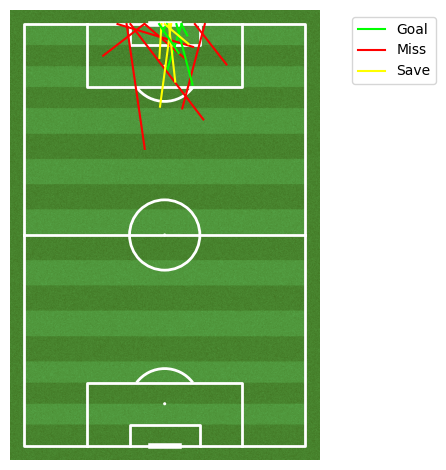

In [42]:
import matplotlib.pyplot as plt

# Código para configurar o pitch e desenhar os chutes
pitch = VerticalPitch(half=False, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.gca().invert_yaxis()

# Listas para armazenar os objetos plotados
goal_plots = []
miss_plots = []
save_plots = []

# Plot dos chutes
for x in range(len(df1['x'])):
    if df['shotType'][x] == 'goal' and df['isHome'][x] == True:
        goal_plot, = plt.plot((df1['x'][x],df1['x_end'][x]),(df1['y'][x],df1['y_end'][x]),color='#00FF00')
        goal_plots.append(goal_plot)

    elif df['shotType'][x] == 'miss' and df['isHome'][x] == True:
        miss_plot, = plt.plot((df1['x'][x],df1['x_end'][x]),(df1['y'][x],df1['y_end'][x]), color='red')
        miss_plots.append(miss_plot)

    elif df['shotType'][x] == 'save' and df['isHome'][x] == True:
        save_plot, = plt.plot((df1['x'][x],df1['x_end'][x]),(df1['y'][x],df1['y_end'][x]),color='yellow')
        save_plots.append(save_plot)

# Adicionando legenda com os rótulos
plt.legend([goal_plots[0], miss_plots[0], save_plots[0]], ['Goal', 'Miss', 'Save'], loc='upper right', bbox_to_anchor=(1.4, 1))

plt.show()


# 4.0 Shots count

In [43]:
# Contando o número de gols, chutes perdidos e chutes salvos
num_goals = len(df[(df['shotType'] == 'goal') & (df['isHome'] == True)])
num_misses = len(df[(df['shotType'] == 'miss') & (df['isHome'] == True)])
num_saves = len(df[(df['shotType'] == 'save') & (df['isHome'] == True)])

# Imprimindo as quantidades
print("Número de gols:", num_goals)
print("Número de chutes perdidos:", num_misses)
print("Número de chutes salvos:", num_saves)

Número de gols: 5
Número de chutes perdidos: 7
Número de chutes salvos: 4


## 4.1 Plot shots percentage

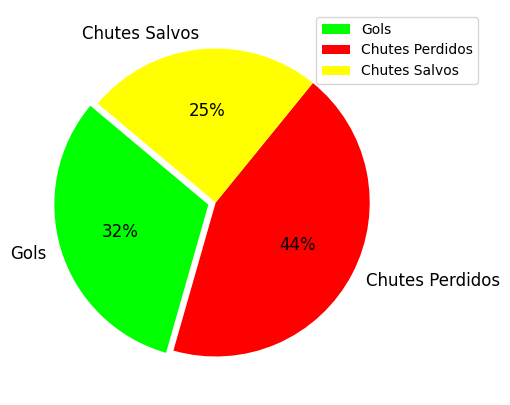

In [64]:
# Contando o número de gols, chutes perdidos e chutes salvos
num_goals = len(df[(df['shotType'] == 'goal') & (df['isHome'] == True)])
num_misses = len(df[(df['shotType'] == 'miss') & (df['isHome'] == True)])
num_saves = len(df[(df['shotType'] == 'save') & (df['isHome'] == True)])

# Calculando as porcentagens
total_shots = num_goals + num_misses + num_saves
percent_goals = math.ceil((num_goals / total_shots) * 100)
percent_misses = math.ceil((num_misses / total_shots) * 100)
percent_saves = math.ceil((num_saves / total_shots) * 100)

# Criando um gráfico de pizza
labels = ['Gols', 'Chutes Perdidos', 'Chutes Salvos']
sizes = [percent_goals, percent_misses, percent_saves]
colors = ['#00FF00', 'red', 'yellow']

# Efeito de explodir a fatia dos gols
explode = (0.05, 0, 0)

plt.figure(figsize=(7, 5))  # Define o tamanho do gráfico
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', startangle=140, textprops={'fontsize': 12})
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()